# Nissen et al., 2023: Severe 21st-century OA in Antarctic MPAs
#
# script to plot MPA mask
#
# note that some paths are hard-coded throughout the script

In [ ]:
#import geopandas as gpd
#import shapefile
#import fiona
import numpy as np
#import geopandas as gpd
import geopandas as gp
import regionmask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
from matplotlib import cm
import matplotlib.colors
import os
from cartopy.util import add_cyclic_point

In [2]:
#---
# load MPAs
#---

path = '/global/cscratch1/sd/cnissen/shape_files/masks_MPAs/'

res = '0.025deg' # 0.025deg or 0.1dg or 0.5deg or 1deg

# cavity mask
ff = xr. open_dataset(path+'Mask_cavities_regular_mesh_0.025deg.nc')
cavities  = ff['mask_cavities'].values
cavities = np.ma.masked_where(cavities>10,cavities)
topo  = ff['topo'].values
topo = np.ma.masked_where(topo>9999,topo)
#topo = np.ma.masked_where(cavities==1,topo)
ff.close()
print('Min/Max topo:',np.min(topo),np.max(topo))


ff = xr. open_dataset(path+'MPA_mask_AntarcticPeninsula_regular_mesh_'+res+'.nc')
lon  = ff['lon'].values
lat  = ff['lat'].values
mask_peninsula  = ff['mask_mpa'].values
ff.close()
   
lat2,lon2 = np.meshgrid(lat,lon)
lat2 = lat2.transpose()
lon2 = lon2.transpose()

## correct cavity in Ross Sea
##ind = np.where((lon2<-170) & (lat2<-77)) #[0]
#cavities[ind] = 1 

ff = xr. open_dataset(path+'MPA_mask_Orkney_regular_mesh_'+res+'.nc')
mask_orkney  = ff['mask_mpa'].values
ff.close()

ff = xr. open_dataset(path+'MPA_mask_East_Antarctica_1_regular_mesh_'+res+'.nc')
mask_eastAA1  = ff['mask_mpa'].values
ff.close()

ff = xr. open_dataset(path+'MPA_mask_East_Antarctica_2_regular_mesh_'+res+'.nc')
mask_eastAA2  = ff['mask_mpa'].values
ff.close()

ff = xr. open_dataset(path+'MPA_mask_East_Antarctica_3_regular_mesh_'+res+'.nc')
mask_eastAA3  = ff['mask_mpa'].values
ff.close()

ff = xr. open_dataset(path+'MPA_mask_RossSea_regular_mesh_'+res+'.nc')
mask_Ross  = ff['mask_mpa'].values
ff.close()

ff = xr. open_dataset(path+'MPA_mask_WeddellSea_regular_mesh_'+res+'.nc')
mask_Weddell  = ff['mask_mpa'].values
ff.close()

print('done')

Min/Max topo: 203.5 5313.1
done


In [3]:

savepath     = '/project/projectdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/'
# check existence of paths
if not os.path.exists(savepath):
    print ('Created '+savepath)
    os.makedirs(savepath)

with_topo = False
if with_topo:
    topo_string='_w2000m_isobath'
else:
    topo_string=''
    
save_plots = True


/global/homes/c/cnissen/.conda/envs/myenv3.7/lib/python3.7/site-packages/ipykernel_launcher.py:167: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
/global/homes/c/cnissen/.conda/envs/myenv3.7/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/global/homes/c/cnissen/.conda/envs/myenv3.7/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/global/homes/c/cnissen/.conda/envs/myenv3.7/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecati

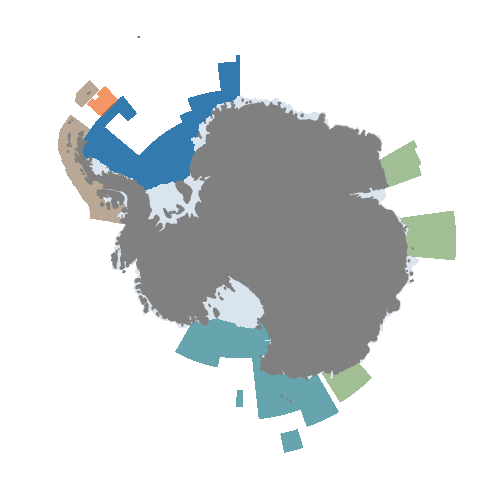

In [4]:
#---
# plot: all MPAs, mask cavities, different colors
#---

# create one mask for each MPA

mask = np.zeros_like(mask_Weddell)
mask[mask_Weddell==1]=1

mask2 = np.zeros_like(mask_Ross)
mask2[mask_Ross==1]=1

mask3 = np.zeros_like(mask_orkney)
mask3[mask_orkney==1]=1

mask4 = np.zeros_like(mask_peninsula)
mask4[mask_peninsula==1]=1

mask5 = np.zeros_like(mask_eastAA1)
mask5[mask_eastAA1==1]=1
mask5[mask_eastAA2==1]=1
mask5[mask_eastAA3==1]=1

# kick out eastern Weddell Sea (Phase 2)
ind = np.where((lon2>0) & (lon2<40)) #[0]
mask[ind]=0

#----
# AA Peninsula
#----
# try to adapt to newer version of domain 1 MPA
ind2 = np.where((lon2>-81.3) & (lon2<-65) & (lat2>-73) & (topo<2800)) #[0]
mask4[ind2] = 1
#
ind2 = np.where((lon2>-81.3) & (lon2<-65) & (lat2>-73) & (topo>2800)) #[0]
mask4[ind2] = 0
mask4 = np.ma.masked_where(mask4==0,mask4)


mask = np.ma.masked_where(mask==0,mask)
mask2 = np.ma.masked_where(mask2==0,mask2)
mask3 = np.ma.masked_where(mask3==0,mask3)
mask4 = np.ma.masked_where(mask4==0,mask4)
mask5 = np.ma.masked_where(mask5==0,mask5)


# Weddell Sea: 
ind = np.where((lat2<=-64.0) & (lon2<-50) & (lon2>-61.5)) #[0]
mask[ind]=1
# Weddell Sea: correct locations close to cavity
ind = np.where((lat2<=-75.3) & (lon2<15) & (lon2>-50.5) ) #[0]
mask[ind]=1
# Weddell Sea: correct piece that reaches into WAP
ind = np.where((lat2>-64.8) & (lon2<-60) & (lon2>-60.2)) #[0]
mask[ind]=0
# eastern Weddell
ind = np.where(((lon2<15) & (lon2>-25.5)) & (lat2<=-70.5)) #[0]
mask[ind]=1
# east Antarctica
ind = np.where(((lon2<69) & (lon2>60)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
ind = np.where(((lon2<95) & (lon2>85)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
ind = np.where(((lon2<145) & (lon2>137)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
# Ross Sea
ind = np.where(((lon2<172.5) & (lon2>150)) & (lat2<=-66) & (lat2>-74)) #[0]
mask2[ind]=1
ind = np.where(lat2<-80) #[0]
mask2[ind]=0

#----
# mask cavities
#----
mask[cavities==1]=0
mask2[cavities==1]=0
mask3[cavities==1]=0
mask4[cavities==1]=0
mask5[cavities==1]=0
mask = np.ma.masked_where(mask==0,mask)
mask2 = np.ma.masked_where(mask2==0,mask2)
mask3 = np.ma.masked_where(mask3==0,mask3)
mask4 = np.ma.masked_where(mask4==0,mask4)
mask5 = np.ma.masked_where(mask5==0,mask5)

res = 0.025
lon1 = np.arange(-180+res,(180-res)+res,res) 

# mask topo in some regions (to have a smooth 200m-isoline)
ind = np.where((lon2>40) & (lon2<100) & (lat2>-63)) #[0]
topo[ind] = 6000
ind = np.where((lon2>179) & (lat2>-71.5)) #[0]
topo[ind] = 6000
ind = np.where((lon2<-179) & (lat2>-71.5)) #[0]
topo[ind] = 6000 

    
mask,lon_plot = add_cyclic_point(mask,coord=lon1)
mask2,lon_plot = add_cyclic_point(mask2,coord=lon1)
mask3,lon_plot = add_cyclic_point(mask3,coord=lon1)
mask4,lon_plot = add_cyclic_point(mask4,coord=lon1)
mask5,lon_plot = add_cyclic_point(mask5,coord=lon1)
topo_plot,lon_plot = add_cyclic_point(topo,coord=lon1)
cavities2,lon_plot = add_cyclic_point(cavities,coord=lon1)

#---
# plot map
#---

#cc1 = (52./255.,103./255.,92./255.) # pine
##cc2 = (93./255.,83./255.,94./255.) # branch
#cc2 = (161./255.,190./255.,149./255.) # sage
#
#cc3 = (45./255.,66./255.,98./255.) # indigo
#cc4 = (77./255.,133./255.,189./255.) # blue
##cc5 = (127./255.,21./255.,46./255.) # purple onion
##cc5 = (246./255.,148./255.,84./255.) # tangerine
##cc5 = (179./255.,136./255.,103./255.) # coffee
#cc5 = (186./255.,168./255.,150./255.) # warm grey


cc1 = (102./255.,165./255.,173./255.) # Ross: wave
cc2 = (161./255.,190./255.,149./255.) # eastAA: sage

cc3 = (51./255.,123./255.,174./255.) # Weddell: bright blue
cc4 = (238./255.,105./255.,36./255.) # Orkney: carrot
#cc4 = (192./255.,88./255.,5./255.) # Orkney: bronze
cc5 = (186./255.,168./255.,150./255.) # Peninsula: warm grey

levels1 = np.arange(0,3,1)
#colors2 = matplotlib.colors.ListedColormap(["aliceblue","aliceblue","aliceblue","aliceblue","aliceblue"])
#colors2 = matplotlib.colors.ListedColormap([(107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.),\
#                                            (107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.)])
colors2 = matplotlib.colors.ListedColormap([(218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.),\
                                            (218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.)])

# darkblue, cornflowerblue, lightskyblue
# darkgreen, mediumseagreen
#colors3 = matplotlib.colors.ListedColormap(["darkgreen","darkgreen","darkgreen","darkgreen","darkgreen"]) # Ross
#colors4 = matplotlib.colors.ListedColormap(["mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen"]) # Orkney
colors3 = matplotlib.colors.ListedColormap([cc1,cc1,cc1,cc1,cc1]) # Ross
colors6 = matplotlib.colors.ListedColormap([cc2,cc2,cc2,cc2,cc2])# eastAA

colors = matplotlib.colors.ListedColormap([cc3,cc3,cc3,cc3,cc3]) # Weddell
colors4 = matplotlib.colors.ListedColormap([cc4,cc4,cc4,cc4,cc4]) # Orkney
colors5 = matplotlib.colors.ListedColormap([cc5,cc5,cc5,cc5,cc5]) # Peninsula

#colors = matplotlib.colors.ListedColormap(["black","black","grey","blue","green"])
#colors3 = matplotlib.colors.ListedColormap(["cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue"])
#colors4 = matplotlib.colors.ListedColormap(["darkblue","darkblue","darkblue","darkblue","darkblue"])
#colors5 = matplotlib.colors.ListedColormap(["firebrick","firebrick","firebrick","firebrick","firebrick"])
#colors6 = matplotlib.colors.ListedColormap(["salmon","salmon","salmon","salmon","salmon"])


projection=ccrs.SouthPolarStereo() #SouthPolarStereo(),PlateCarree()

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-180,1800, -90, -58], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND,facecolor=("grey"),zorder=50)
ax.coastlines(resolution='50m')
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes) #,color='blue'
ax.outline_patch.set_edgecolor(None) # white

mm1=ax.contourf(lon_plot, lat, cavities2,\
               levels=levels1,extend='both',cmap=colors2,transform=ccrs.PlateCarree())

mm1=ax.contourf(lon_plot, lat, mask,\
               levels=levels1,extend='both',cmap=colors,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask2,\
               levels=levels1,extend='both',cmap=colors3,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask3,\
               levels=levels1,extend='both',cmap=colors4,alpha=0.7,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask4,\
               levels=levels1,extend='both',cmap=colors5,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask5,\
               levels=levels1,extend='both',cmap=colors6,transform=ccrs.PlateCarree())

if with_topo:
    mm1=ax.contour(lon_plot, lat, topo_plot,[2000],colors=['dimgrey'],linewidths=[1.2],zorder=20,transform=ccrs.PlateCarree())
    
cavity_contour = True
if cavity_contour:
    mm1=ax.contour(lon_plot, lat, cavities2,[1],colors=['black'],linewidths=[0.5],zorder=20,transform=ccrs.PlateCarree())

if save_plots:
    dpicnt = 200
    versionID = 'v4'
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_transparent_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png',transparent=True)
    del filename
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')
    del filename
    dpicnt = 100
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_'+versionID+'.eps'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
    del filename
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_'+versionID+'.pdf'
    plt.savefig(savepath+filename, dpi = dpicnt, bbox_inches='tight', format='pdf',transparent=True)
    del filename
    
plt.show()


Plot  WeddellSea


/global/homes/c/cnissen/.conda/envs/myenv3.7/lib/python3.7/site-packages/ipykernel_launcher.py:171: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


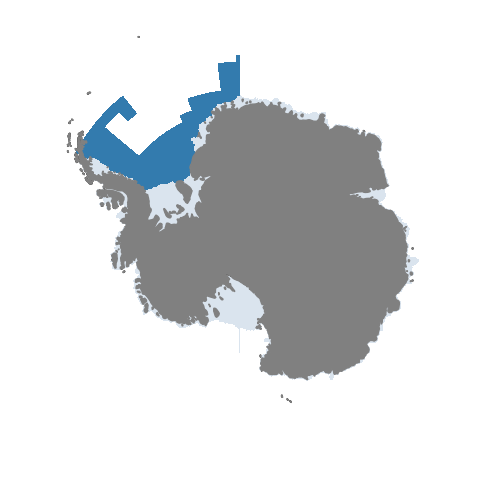

In [5]:
#---
# plot: INDIVIDUAL MPAs, mask cavities, different colors
#---

which_mpa = 'WeddellSea' # WeddellSea, RossSea, Orkney, AntarcticPeninsula, eastAA
print('Plot ',which_mpa)


# create one mask for each MPA

mask = np.zeros_like(mask_Weddell)
mask[mask_Weddell==1]=1

mask2 = np.zeros_like(mask_Ross)
mask2[mask_Ross==1]=1

mask3 = np.zeros_like(mask_orkney)
mask3[mask_orkney==1]=1

mask4 = np.zeros_like(mask_peninsula)
mask4[mask_peninsula==1]=1

mask5 = np.zeros_like(mask_eastAA1)
mask5[mask_eastAA1==1]=1
mask5[mask_eastAA2==1]=1
mask5[mask_eastAA3==1]=1

# kick out eastern Weddell Sea (Phase 2)
ind = np.where((lon2>0) & (lon2<40)) #[0]
mask[ind]=0

#----
# AA Peninsula
#----
# try to adapt to newer version of domain 1 MPA
ind2 = np.where((lon2>-81.3) & (lon2<-65) & (lat2>-73) & (topo<2800)) #[0]
mask4[ind2] = 1
#
ind2 = np.where((lon2>-81.3) & (lon2<-65) & (lat2>-73) & (topo>2800)) #[0]
mask4[ind2] = 0
mask4 = np.ma.masked_where(mask4==0,mask4)


mask = np.ma.masked_where(mask==0,mask)
mask2 = np.ma.masked_where(mask2==0,mask2)
mask3 = np.ma.masked_where(mask3==0,mask3)
mask4 = np.ma.masked_where(mask4==0,mask4)
mask5 = np.ma.masked_where(mask5==0,mask5)


# Weddell Sea: 
ind = np.where((lat2<=-64.0) & (lon2<-50) & (lon2>-61.5)) #[0]
mask[ind]=1
# Weddell Sea: correct locations close to cavity
ind = np.where((lat2<=-75.3) & (lon2<15) & (lon2>-50.5) ) #[0]
mask[ind]=1
# Weddell Sea: correct piece that reaches into WAP
ind = np.where((lat2>-64.8) & (lon2<-60) & (lon2>-60.2)) #[0]
mask[ind]=0
# eastern Weddell
ind = np.where(((lon2<15) & (lon2>-25.5)) & (lat2<=-70.5)) #[0]
mask[ind]=1
# east Antarctica
ind = np.where(((lon2<69) & (lon2>60)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
ind = np.where(((lon2<95) & (lon2>85)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
ind = np.where(((lon2<145) & (lon2>137)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
# Ross Sea
ind = np.where(((lon2<172.5) & (lon2>150)) & (lat2<=-66) & (lat2>-74)) #[0]
mask2[ind]=1
ind = np.where(lat2<-80) #[0]
mask2[ind]=0

#----
# mask cavities
#----
mask[cavities==1]=0
mask2[cavities==1]=0
mask3[cavities==1]=0
mask4[cavities==1]=0
mask5[cavities==1]=0
mask = np.ma.masked_where(mask==0,mask)
mask2 = np.ma.masked_where(mask2==0,mask2)
mask3 = np.ma.masked_where(mask3==0,mask3)
mask4 = np.ma.masked_where(mask4==0,mask4)
mask5 = np.ma.masked_where(mask5==0,mask5)

res = 0.025
lon1 = np.arange(-180+res,(180-res)+res,res) 

# mask topo in some regions (to have a smooth 200m-isoline)
ind = np.where((lon2>40) & (lon2<100) & (lat2>-63)) #[0]
topo[ind] = 6000
ind = np.where((lon2>179) & (lat2>-71.5)) #[0]
topo[ind] = 6000
ind = np.where((lon2<-179) & (lat2>-71.5)) #[0]
topo[ind] = 6000 

    
mask,lon_plot = add_cyclic_point(mask,coord=lon1)
mask2,lon_plot = add_cyclic_point(mask2,coord=lon1)
mask3,lon_plot = add_cyclic_point(mask3,coord=lon1)
mask4,lon_plot = add_cyclic_point(mask4,coord=lon1)
mask5,lon_plot = add_cyclic_point(mask5,coord=lon1)
topo_plot,lon_plot = add_cyclic_point(topo,coord=lon1)
cavities2,lon_plot = add_cyclic_point(cavities,coord=lon1)

#---
# plot map
#---

#cc1 = (52./255.,103./255.,92./255.) # pine
##cc2 = (93./255.,83./255.,94./255.) # branch
#cc2 = (161./255.,190./255.,149./255.) # sage
#
#cc3 = (45./255.,66./255.,98./255.) # indigo
#cc4 = (77./255.,133./255.,189./255.) # blue
##cc5 = (127./255.,21./255.,46./255.) # purple onion
##cc5 = (246./255.,148./255.,84./255.) # tangerine
##cc5 = (179./255.,136./255.,103./255.) # coffee
#cc5 = (186./255.,168./255.,150./255.) # warm grey


cc1 = (102./255.,165./255.,173./255.) # Ross: wave
cc2 = (161./255.,190./255.,149./255.) # eastAA: sage

cc3 = (51./255.,123./255.,174./255.) # Weddell: bright blue
cc4 = (238./255.,105./255.,36./255.) # Orkney: carrot
#cc4 = (192./255.,88./255.,5./255.) # Orkney: bronze
cc5 = (186./255.,168./255.,150./255.) # Peninsula: warm grey

levels1 = np.arange(0,3,1)
#colors2 = matplotlib.colors.ListedColormap(["aliceblue","aliceblue","aliceblue","aliceblue","aliceblue"])
#colors2 = matplotlib.colors.ListedColormap([(107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.),\
#                                            (107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.)])
colors2 = matplotlib.colors.ListedColormap([(218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.),\
                                            (218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.)])

# darkblue, cornflowerblue, lightskyblue
# darkgreen, mediumseagreen
#colors3 = matplotlib.colors.ListedColormap(["darkgreen","darkgreen","darkgreen","darkgreen","darkgreen"]) # Ross
#colors4 = matplotlib.colors.ListedColormap(["mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen"]) # Orkney
colors3 = matplotlib.colors.ListedColormap([cc1,cc1,cc1,cc1,cc1]) # Ross
colors6 = matplotlib.colors.ListedColormap([cc2,cc2,cc2,cc2,cc2])# eastAA

colors = matplotlib.colors.ListedColormap([cc3,cc3,cc3,cc3,cc3]) # Weddell
colors4 = matplotlib.colors.ListedColormap([cc4,cc4,cc4,cc4,cc4]) # Orkney
colors5 = matplotlib.colors.ListedColormap([cc5,cc5,cc5,cc5,cc5]) # Peninsula

#colors = matplotlib.colors.ListedColormap(["black","black","grey","blue","green"])
#colors3 = matplotlib.colors.ListedColormap(["cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue"])
#colors4 = matplotlib.colors.ListedColormap(["darkblue","darkblue","darkblue","darkblue","darkblue"])
#colors5 = matplotlib.colors.ListedColormap(["firebrick","firebrick","firebrick","firebrick","firebrick"])
#colors6 = matplotlib.colors.ListedColormap(["salmon","salmon","salmon","salmon","salmon"])


projection=ccrs.SouthPolarStereo() #SouthPolarStereo(),PlateCarree()

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-180,1800, -90, -58], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND,facecolor=("grey"),zorder=50)
ax.coastlines(resolution='50m')
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes) #,color='blue'
ax.outline_patch.set_edgecolor(None) # white

mm1=ax.contourf(lon_plot, lat, cavities2,\
               levels=levels1,extend='both',cmap=colors2,transform=ccrs.PlateCarree())

if which_mpa in ['WeddellSea']:
    mm1=ax.contourf(lon_plot, lat, mask,\
               levels=levels1,extend='both',cmap=colors,transform=ccrs.PlateCarree())
elif which_mpa in ['RossSea']:
    mm1=ax.contourf(lon_plot, lat, mask2,\
               levels=levels1,extend='both',cmap=colors3,transform=ccrs.PlateCarree())
elif which_mpa in ['Orkney']:
    mm1=ax.contourf(lon_plot, lat, mask3,\
               levels=levels1,extend='both',cmap=colors4,alpha=0.7,transform=ccrs.PlateCarree())
elif which_mpa in ['AntarcticPeninsula']:
    mm1=ax.contourf(lon_plot, lat, mask4,\
               levels=levels1,extend='both',cmap=colors5,transform=ccrs.PlateCarree())
elif which_mpa in ['eastAA']:
    mm1=ax.contourf(lon_plot, lat, mask5,\
               levels=levels1,extend='both',cmap=colors6,transform=ccrs.PlateCarree())

if with_topo:
    mm1=ax.contour(lon_plot, lat, topo_plot,[2000],colors=['dimgrey'],linewidths=[1.2],zorder=20,transform=ccrs.PlateCarree())
    
cavity_contour = True
if cavity_contour:
    mm1=ax.contour(lon_plot, lat, cavities2,[1],colors=['black'],linewidths=[0.5],zorder=20,transform=ccrs.PlateCarree())

if save_plots:
    dpicnt = 200
    versionID = 'v4'
    filename = 'MPA_mask_single_MPA_'+which_mpa+'_different_colors_masked_cavities'+topo_string+'_transparent_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png',transparent=True)
    del filename
    filename = 'MPA_mask_single_MPA_'+which_mpa+'_different_colors_masked_cavities'+topo_string+'_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')
    del filename
    dpicnt = 100
    filename = 'MPA_mask_single_MPA_'+which_mpa+'_different_colors_masked_cavities'+topo_string+'_'+versionID+'.eps'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
    del filename
    filename = 'MPA_mask_single_MPA_'+which_mpa+'_different_colors_masked_cavities'+topo_string+'_'+versionID+'.pdf'
    plt.savefig(savepath+filename, dpi = dpicnt, bbox_inches='tight', format='pdf',transparent=True)
    del filename
    
plt.show()


/global/homes/c/cnissen/.conda/envs/myenv3.7/lib/python3.7/site-packages/ipykernel_launcher.py:80: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


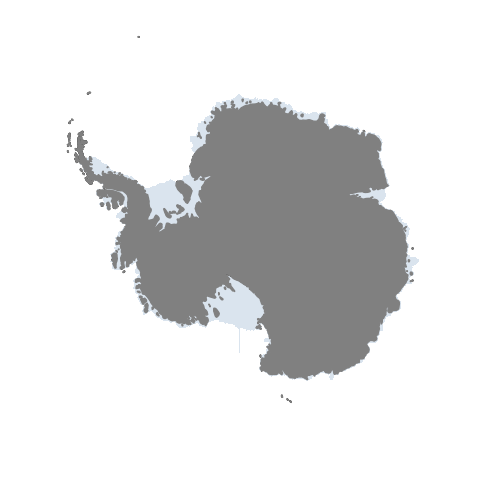

In [19]:
#---
# plot: empty SO map, with different isobaths
#---

res = 0.025
lon1 = np.arange(-180+res,(180-res)+res,res) 

# mask topo in some regions (to have a smooth 200m-isoline)
ind = np.where((lon2>40) & (lon2<100) & (lat2>-63)) #[0]
topo[ind] = 6000
ind = np.where((lon2>179) & (lat2>-71.5)) #[0]
topo[ind] = 6000
ind = np.where((lon2<-179) & (lat2>-71.5)) #[0]
topo[ind] = 6000 

topo_plot,lon_plot = add_cyclic_point(topo,coord=lon1)
cavities2,lon_plot = add_cyclic_point(cavities,coord=lon1)

#---
# plot map
#---

#cc1 = (52./255.,103./255.,92./255.) # pine
##cc2 = (93./255.,83./255.,94./255.) # branch
#cc2 = (161./255.,190./255.,149./255.) # sage
#
#cc3 = (45./255.,66./255.,98./255.) # indigo
#cc4 = (77./255.,133./255.,189./255.) # blue
##cc5 = (127./255.,21./255.,46./255.) # purple onion
##cc5 = (246./255.,148./255.,84./255.) # tangerine
##cc5 = (179./255.,136./255.,103./255.) # coffee
#cc5 = (186./255.,168./255.,150./255.) # warm grey


cc1 = (102./255.,165./255.,173./255.) # Ross: wave
cc2 = (161./255.,190./255.,149./255.) # eastAA: sage

cc3 = (51./255.,123./255.,174./255.) # Weddell: bright blue
cc4 = (238./255.,105./255.,36./255.) # Orkney: carrot
#cc4 = (192./255.,88./255.,5./255.) # Orkney: bronze
cc5 = (186./255.,168./255.,150./255.) # Peninsula: warm grey

levels1 = np.arange(0,3,1)
#colors2 = matplotlib.colors.ListedColormap(["aliceblue","aliceblue","aliceblue","aliceblue","aliceblue"])
#colors2 = matplotlib.colors.ListedColormap([(107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.),\
#                                            (107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.)])
colors2 = matplotlib.colors.ListedColormap([(218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.),\
                                            (218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.)])

# darkblue, cornflowerblue, lightskyblue
# darkgreen, mediumseagreen
#colors3 = matplotlib.colors.ListedColormap(["darkgreen","darkgreen","darkgreen","darkgreen","darkgreen"]) # Ross
#colors4 = matplotlib.colors.ListedColormap(["mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen"]) # Orkney
colors3 = matplotlib.colors.ListedColormap([cc1,cc1,cc1,cc1,cc1]) # Ross
colors6 = matplotlib.colors.ListedColormap([cc2,cc2,cc2,cc2,cc2])# eastAA

colors = matplotlib.colors.ListedColormap([cc3,cc3,cc3,cc3,cc3]) # Weddell
colors4 = matplotlib.colors.ListedColormap([cc4,cc4,cc4,cc4,cc4]) # Orkney
colors5 = matplotlib.colors.ListedColormap([cc5,cc5,cc5,cc5,cc5]) # Peninsula

#colors = matplotlib.colors.ListedColormap(["black","black","grey","blue","green"])
#colors3 = matplotlib.colors.ListedColormap(["cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue"])
#colors4 = matplotlib.colors.ListedColormap(["darkblue","darkblue","darkblue","darkblue","darkblue"])
#colors5 = matplotlib.colors.ListedColormap(["firebrick","firebrick","firebrick","firebrick","firebrick"])
#colors6 = matplotlib.colors.ListedColormap(["salmon","salmon","salmon","salmon","salmon"])


projection=ccrs.SouthPolarStereo() #SouthPolarStereo(),PlateCarree()

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-180,1800, -90, -58], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND,facecolor=("grey"),zorder=50)
ax.coastlines(resolution='50m')
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes) #,color='blue'
ax.outline_patch.set_edgecolor(None) # white


mm1=ax.contourf(lon_plot, lat, cavities2,\
               levels=levels1,extend='both',cmap=colors2,transform=ccrs.PlateCarree())

with_topo = False
if with_topo:
    topo_string = 'with_isobaths_'
    topo_plot[cavities2==1] = -999 # I don't want isobaths in cavities!
    mm1=ax.contour(lon_plot, lat, topo_plot,[1000,2500],\
                   colors=['dimgrey','dimgrey','dimgrey','dimgrey'],\
                   linewidths=[1.2,1.2,1.2,1.2],zorder=20,transform=ccrs.PlateCarree())
else:
    topo_string = ''
    
cavity_contour = True
if cavity_contour:
    mm1=ax.contour(lon_plot, lat, cavities2,[1],colors=['black'],linewidths=[0.5],zorder=20,transform=ccrs.PlateCarree())

save_plots = True
if save_plots:
    dpicnt = 200
    versionID = 'v1'
    filename = 'SO_map_'+topo_string+'masked_cavities_transparent_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png',transparent=True)
    del filename
    filename = 'SO_map_'+topo_string+'masked_cavities_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')
    del filename
    dpicnt = 100
    filename = 'SO_map_'+topo_string+'masked_cavities_'+versionID+'.eps'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
    del filename
    filename = 'SO_map_'+topo_string+'masked_cavities_'+versionID+'.pdf'
    plt.savefig(savepath+filename, dpi = dpicnt, bbox_inches='tight', format='pdf',transparent=True)
    del filename
    
plt.show()


/global/homes/c/cnissen/.conda/envs/myenv3.7/lib/python3.7/site-packages/ipykernel_launcher.py:167: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


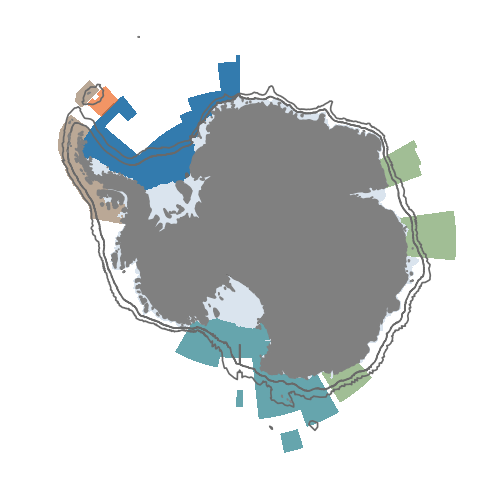

In [30]:
#---
# plot: all MPAs, mask cavities, different colors -> more isobaths
#---

# create one mask for each MPA

mask = np.zeros_like(mask_Weddell)
mask[mask_Weddell==1]=1

mask2 = np.zeros_like(mask_Ross)
mask2[mask_Ross==1]=1

mask3 = np.zeros_like(mask_orkney)
mask3[mask_orkney==1]=1

mask4 = np.zeros_like(mask_peninsula)
mask4[mask_peninsula==1]=1

mask5 = np.zeros_like(mask_eastAA1)
mask5[mask_eastAA1==1]=1
mask5[mask_eastAA2==1]=1
mask5[mask_eastAA3==1]=1

# kick out eastern Weddell Sea (Phase 2)
ind = np.where((lon2>0) & (lon2<40)) #[0]
mask[ind]=0

#----
# AA Peninsula
#----
# try to adapt to newer version of domain 1 MPA
ind2 = np.where((lon2>-81.3) & (lon2<-65) & (lat2>-73) & (topo<2800)) #[0]
mask4[ind2] = 1
#
ind2 = np.where((lon2>-81.3) & (lon2<-65) & (lat2>-73) & (topo>2800)) #[0]
mask4[ind2] = 0
mask4 = np.ma.masked_where(mask4==0,mask4)


mask = np.ma.masked_where(mask==0,mask)
mask2 = np.ma.masked_where(mask2==0,mask2)
mask3 = np.ma.masked_where(mask3==0,mask3)
mask4 = np.ma.masked_where(mask4==0,mask4)
mask5 = np.ma.masked_where(mask5==0,mask5)


# Weddell Sea: 
ind = np.where((lat2<=-64.0) & (lon2<-50) & (lon2>-61.5)) #[0]
mask[ind]=1
# Weddell Sea: correct locations close to cavity
ind = np.where((lat2<=-75.3) & (lon2<15) & (lon2>-50.5) ) #[0]
mask[ind]=1
# Weddell Sea: correct piece that reaches into WAP
ind = np.where((lat2>-64.8) & (lon2<-60) & (lon2>-60.2)) #[0]
mask[ind]=0
# eastern Weddell
ind = np.where(((lon2<15) & (lon2>-25.5)) & (lat2<=-70.5)) #[0]
mask[ind]=1
# east Antarctica
ind = np.where(((lon2<69) & (lon2>60)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
ind = np.where(((lon2<95) & (lon2>85)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
ind = np.where(((lon2<145) & (lon2>137)) & (lat2<=-66) & (lat2>-69)) #[0]
mask5[ind]=1
# Ross Sea
ind = np.where(((lon2<172.5) & (lon2>150)) & (lat2<=-66) & (lat2>-74)) #[0]
mask2[ind]=1
ind = np.where(lat2<-80) #[0]
mask2[ind]=0

#----
# mask cavities
#----
mask[cavities==1]=0
mask2[cavities==1]=0
mask3[cavities==1]=0
mask4[cavities==1]=0
mask5[cavities==1]=0
mask = np.ma.masked_where(mask==0,mask)
mask2 = np.ma.masked_where(mask2==0,mask2)
mask3 = np.ma.masked_where(mask3==0,mask3)
mask4 = np.ma.masked_where(mask4==0,mask4)
mask5 = np.ma.masked_where(mask5==0,mask5)

res = 0.025
lon1 = np.arange(-180+res,(180-res)+res,res) 

# mask topo in some regions (to have a smooth 200m-isoline)
ind = np.where((lon2>40) & (lon2<100) & (lat2>-63)) #[0]
topo[ind] = 6000
ind = np.where((lon2>179) & (lat2>-71.5)) #[0]
topo[ind] = 6000
ind = np.where((lon2<-179) & (lat2>-71.5)) #[0]
topo[ind] = 6000 

    
mask,lon_plot = add_cyclic_point(mask,coord=lon1)
mask2,lon_plot = add_cyclic_point(mask2,coord=lon1)
mask3,lon_plot = add_cyclic_point(mask3,coord=lon1)
mask4,lon_plot = add_cyclic_point(mask4,coord=lon1)
mask5,lon_plot = add_cyclic_point(mask5,coord=lon1)
topo_plot,lon_plot = add_cyclic_point(topo,coord=lon1)
cavities2,lon_plot = add_cyclic_point(cavities,coord=lon1)

#---
# plot map
#---

#cc1 = (52./255.,103./255.,92./255.) # pine
##cc2 = (93./255.,83./255.,94./255.) # branch
#cc2 = (161./255.,190./255.,149./255.) # sage
#
#cc3 = (45./255.,66./255.,98./255.) # indigo
#cc4 = (77./255.,133./255.,189./255.) # blue
##cc5 = (127./255.,21./255.,46./255.) # purple onion
##cc5 = (246./255.,148./255.,84./255.) # tangerine
##cc5 = (179./255.,136./255.,103./255.) # coffee
#cc5 = (186./255.,168./255.,150./255.) # warm grey


cc1 = (102./255.,165./255.,173./255.) # Ross: wave
cc2 = (161./255.,190./255.,149./255.) # eastAA: sage

cc3 = (51./255.,123./255.,174./255.) # Weddell: bright blue
cc4 = (238./255.,105./255.,36./255.) # Orkney: carrot
#cc4 = (192./255.,88./255.,5./255.) # Orkney: bronze
cc5 = (186./255.,168./255.,150./255.) # Peninsula: warm grey

levels1 = np.arange(0,3,1)
#colors2 = matplotlib.colors.ListedColormap(["aliceblue","aliceblue","aliceblue","aliceblue","aliceblue"])
#colors2 = matplotlib.colors.ListedColormap([(107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.),\
#                                            (107./255.,209./255.,252./255.),(107./255.,209./255.,252./255.)])
colors2 = matplotlib.colors.ListedColormap([(218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.),\
                                            (218./255.,228./255.,238./255.),(218./255.,228./255.,238./255.)])

# darkblue, cornflowerblue, lightskyblue
# darkgreen, mediumseagreen
#colors3 = matplotlib.colors.ListedColormap(["darkgreen","darkgreen","darkgreen","darkgreen","darkgreen"]) # Ross
#colors4 = matplotlib.colors.ListedColormap(["mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen"]) # Orkney
colors3 = matplotlib.colors.ListedColormap([cc1,cc1,cc1,cc1,cc1]) # Ross
colors6 = matplotlib.colors.ListedColormap([cc2,cc2,cc2,cc2,cc2])# eastAA

colors = matplotlib.colors.ListedColormap([cc3,cc3,cc3,cc3,cc3]) # Weddell
colors4 = matplotlib.colors.ListedColormap([cc4,cc4,cc4,cc4,cc4]) # Orkney
colors5 = matplotlib.colors.ListedColormap([cc5,cc5,cc5,cc5,cc5]) # Peninsula

#colors = matplotlib.colors.ListedColormap(["black","black","grey","blue","green"])
#colors3 = matplotlib.colors.ListedColormap(["cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue"])
#colors4 = matplotlib.colors.ListedColormap(["darkblue","darkblue","darkblue","darkblue","darkblue"])
#colors5 = matplotlib.colors.ListedColormap(["firebrick","firebrick","firebrick","firebrick","firebrick"])
#colors6 = matplotlib.colors.ListedColormap(["salmon","salmon","salmon","salmon","salmon"])


projection=ccrs.SouthPolarStereo() #SouthPolarStereo(),PlateCarree()

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-180,1800, -90, -58], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND,facecolor=("grey"),zorder=50)
ax.coastlines(resolution='50m')
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes) #,color='blue'
ax.outline_patch.set_edgecolor(None) # white

mm1=ax.contourf(lon_plot, lat, cavities2,\
               levels=levels1,extend='both',cmap=colors2,transform=ccrs.PlateCarree())

mm1=ax.contourf(lon_plot, lat, mask,\
               levels=levels1,extend='both',cmap=colors,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask2,\
               levels=levels1,extend='both',cmap=colors3,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask3,\
               levels=levels1,extend='both',cmap=colors4,alpha=0.7,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask4,\
               levels=levels1,extend='both',cmap=colors5,transform=ccrs.PlateCarree())
mm1=ax.contourf(lon_plot, lat, mask5,\
               levels=levels1,extend='both',cmap=colors6,transform=ccrs.PlateCarree())

with_topo = True
if with_topo:
    topo_string = 'with_isobaths_'
    topo_plot[cavities2==1] = -999 # I don't want isobaths in cavities!
    #topo_plot[topo_plot<=1100] = -999 # test if I can make dateline look better! does not work
    mm1=ax.contour(lon_plot, lat, topo_plot,[1000,2500],\
                   colors=['dimgrey','dimgrey','dimgrey','dimgrey'],\
                   linewidths=[1.2,1.2,1.2,1.2],zorder=20,transform=ccrs.PlateCarree())
else:
    topo_string = ''
    #mm1=ax.contour(lon_plot, lat, topo_plot,[2000],colors=['dimgrey'],linewidths=[1.2],zorder=20,transform=ccrs.PlateCarree())
    
cavity_contour = True
if cavity_contour:
    mm1=ax.contour(lon_plot, lat, cavities2,[1],colors=['black'],linewidths=[0.5],zorder=20,transform=ccrs.PlateCarree())

save_plots = False
if save_plots:
    dpicnt = 200
    versionID = 'v5'
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_transparent_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png',transparent=True)
    del filename
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_'+versionID+'.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')
    del filename
    dpicnt = 100
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_'+versionID+'.eps'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
    del filename
    filename = 'MPA_mask_MPAs_different_colors_masked_cavities'+topo_string+'_'+versionID+'.pdf'
    plt.savefig(savepath+filename, dpi = dpicnt, bbox_inches='tight', format='pdf',transparent=True)
    del filename
    
plt.show()


In [18]:
print(savepath)

/project/projectdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/
